## Simulate data for the population
Get the 10% of the actual population as a representative sample

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 4th cast: miners and farmers

The reason behind choosing this specific distribution is explained in more depth in the Obsidian notes. 
Short: Brazilian favelas have the median age of 30, which is same for the entire population of El Salvador, which is the closest I could get to favela population. 
I calculate the variance of the distribution using El Salvadors age pyramid data from US Census Bureau dataset. 

In [ ]:
def avg(x, y):
    return (x + y) / 2

women, men = 0.517, 0.483
divider = 6800000
sample_size = int((35200 + 28000) * 0.015)

def simulateWomanPopulation(women, sample_size):
    sample_size = int(round(sample_size * women, 0))
    bins = np.array([19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 90])
    probs = np.array([0.041, 0.043, 0.047, 0.045, 0.039, 0.034, 0.032, 0.028, 0.025, 0.021, 0.017, 0.013, 0.009, 0.006])
    probs = probs / probs.sum()
    bin_indices = np.random.choice(len(probs), size=sample_size, p=probs)
    samples = np.random.uniform(bins[bin_indices], bins[bin_indices+1])
    return samples

def simulateManPopulation(men, sample_size):
    sample_size = int(round(sample_size * men, 0)) 
    bins = np.array([19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 90])
    probs = np.array([0.043, 0.045, 0.047, 0.044, 0.036, 0.030, 0.026, 0.022, 0.017, 0.015, 0.012, 0.009, 0.007, 0.005])
    probs = probs / probs.sum()
    bin_indices = np.random.choice(len(probs), size=sample_size, p=probs)
    samples = np.random.uniform(bins[bin_indices], bins[bin_indices+1])
    return samples

    
women_sample = simulateWomanPopulation(women, sample_size)
men_sample = simulateManPopulation(men, sample_size)
cast4_population_sample = pd.DataFrame({
    "idx":range(0, sample_size),
    "age":np.concatenate(
        [np.round(women_sample, 0).astype('int'),
          np.round(men_sample, 0).astype('int')]
          ), 
    'sex':np.concatenate(
        [np.zeros(int(round(women * sample_size, 0))).astype('int'),
          np.ones(int(round(men * sample_size, 0))).astype('int')]
          )
})

cast4_population_sample.head()

,idx,age,sex
0,0,48,0
1,1,68,0
2,2,81,0
3,3,31,0
4,4,32,0


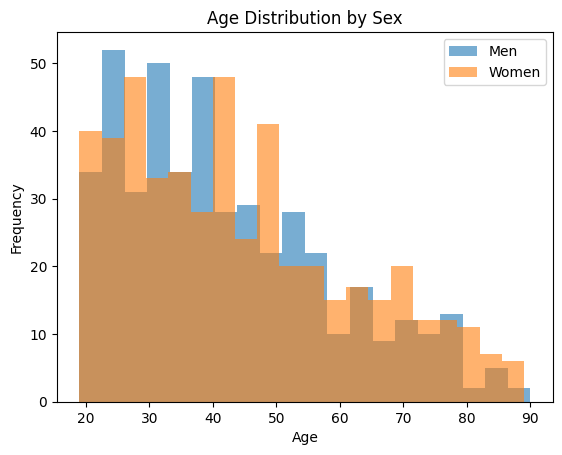

In [ ]:
men = cast4_population_sample[cast4_population_sample['sex'] == 1]['age']
women = cast4_population_sample[cast4_population_sample['sex'] == 0]['age']

plt.hist(men, bins=20, alpha=0.6, label='Men')
plt.hist(women, bins=20, alpha=0.6, label='Women')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender')
plt.legend()
plt.show()